In [1]:
import gym
import dosing_rl_gym
from dosing_rl_gym.util import plot_env
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Insulin treatment as a control problem in Type-1 diabetics

This simulator was inspired by the following work:
- [Maintain Glucose in Type-I Diabetic](http://apmonitor.com/pdc/index.php/Main/DiabeticBloodGlucose)
- [simglucose](https://github.com/jxx123/simglucose), an implementation of the FDA-approved 2008 version [UVA/Padova Simulator](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4454102/)

This simulator is based on an expanded version of the [Bergman minimal model](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2769674/), which includes meal disturbances. The underlying mathematical representation of this model was developed in Python by [John D. Hedengren](http://apmonitor.com/pdc/index.php/Main/HomePage).

The goal is to keep glucose levels at a tolerable level in Type-1 diabetic patients. This process can be controlled using remote insulin uptake (blue series).

Currently, there are two versions of this envrionment: `Diabetic-v0` and `Diabetic-v1`. The only difference between the two is that `Diabetic-v0` maintains the exact same meal disturbance pattern no matter what, while `Diabetic-v1` samples from a smoothed meal / time distribution, thus creating episodes (patients) with different meal amounts across different times of the day:

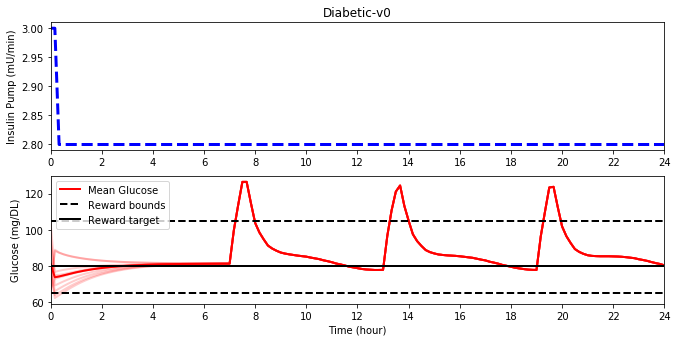

In [2]:
plot_env(env_name="Diabetic-v0", n_episodes=10)

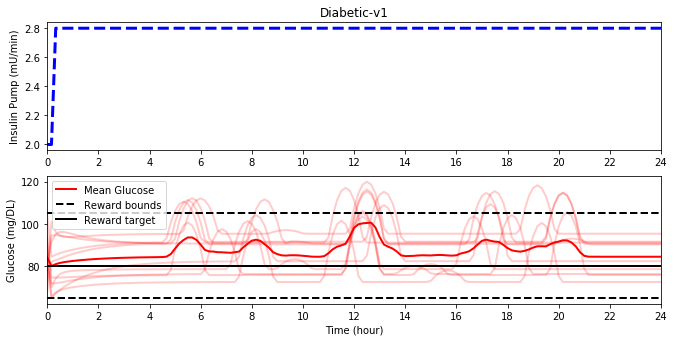

In [3]:
plot_env(env_name="Diabetic-v1", n_episodes=10)

## More background:
- Each episode can be thought of as a patient's treatment journey and they're currently set to 144 steps (every 10 minutes in 1 day)
- Episodes are `done` when:
    - 1 day (144 steps) is completed

## Reward
The reward function is a smooth function bounded between -1 and 1 and is created based on the distance from target blood glucose levels (80 mg/dL) and and safe boundary levels (65 mg/dLand 105 mg/dL).

Text(0, 0.5, 'Reward')

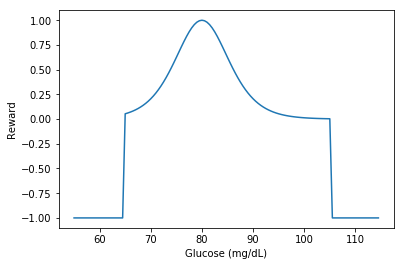

In [4]:
g = 0.7
target= 80.0
lb, ub = 65.0, 105.0
reward_func = []
dr = np.arange(55.0, 115.0, .5)
for v in dr:
    r = 1. - np.tanh(np.abs((v - target) / g) * .1) ** 2
    if (v < lb) or (v > ub):
        r = -1.
    reward_func.append(r)
plt.plot(dr, reward_func)
plt.xlabel('Glucose (mg/dL)')
plt.ylabel('Reward')

## State definition
- 0	Blood Glucose (mg/dL)
- 1	Remote Insulin (micro-u/ml)
- 2	Plasma Insulin (micro-u/ml)
- 3	S1       
- 4	S2                                  
- 5	Gut blood glucose (mg/dl)                               
- 6	Meal disturbance (mmol/L-min)
- 7	Previous Blood glucose (mg/dL)           
- 8 Previous meal disturbance (mmol/L-min)